In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics
import matplotlib.pyplot as plt

# Importing Data Sets

## data.csv

In [9]:
data = pd.read_csv('data.csv')
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

# Cleaning Data

In [3]:
# dropping the Nan from the column year to clean the data set up
data = data.dropna(subset = ["year"])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [14]:
 #setting the start and end dates for scaling the data set for songs BEFORE the 21st century
start_date = 0
end_date = 2000

after_start_date = data["year"] >= start_date
before_end_date = data["year"] <= end_date
between_two_dates = after_start_date & before_end_date
before_twentyfirst_century = data.loc[between_two_dates]

before_twentyfirst_century.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130253 entries, 0 to 167908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      130253 non-null  float64
 1   artists           130253 non-null  object 
 2   danceability      130253 non-null  float64
 3   duration_ms       130253 non-null  int64  
 4   energy            130253 non-null  float64
 5   explicit          130253 non-null  int64  
 6   id                130253 non-null  object 
 7   instrumentalness  130253 non-null  float64
 8   key               130253 non-null  int64  
 9   liveness          130253 non-null  float64
 10  loudness          130253 non-null  float64
 11  mode              130253 non-null  int64  
 12  name              130253 non-null  object 
 13  popularity        130253 non-null  int64  
 14  release_date      130253 non-null  object 
 15  speechiness       130253 non-null  float64
 16  tempo             13

In [13]:
 #setting the start and end dates for scaling the data set for songs AFTER the 21st century
start_date = 2001
end_date = 2020

after_start_date = data["year"] >= start_date
before_end_date = data["year"] <= end_date
between_two_dates = after_start_date & before_end_date
after_twentyfirst_century = data.loc[between_two_dates]

after_twentyfirst_century.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39656 entries, 6154 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      39656 non-null  float64
 1   artists           39656 non-null  object 
 2   danceability      39656 non-null  float64
 3   duration_ms       39656 non-null  int64  
 4   energy            39656 non-null  float64
 5   explicit          39656 non-null  int64  
 6   id                39656 non-null  object 
 7   instrumentalness  39656 non-null  float64
 8   key               39656 non-null  int64  
 9   liveness          39656 non-null  float64
 10  loudness          39656 non-null  float64
 11  mode              39656 non-null  int64  
 12  name              39656 non-null  object 
 13  popularity        39656 non-null  int64  
 14  release_date      39656 non-null  object 
 15  speechiness       39656 non-null  float64
 16  tempo             39656 non-null  fl

In [6]:
# create a list of our conditions
conditions = [
    (data['year'] <= 2000),
    (data['year'] >= 2001)
    ]

# create a list of the values we want to assign for each condition
values = ['before_21st_century', 'after_21st_century']

# create a new column and use np.select to assign values to it using our lists as arguments
data['years_split'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,years_split
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,before_21st_century
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,before_21st_century
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,before_21st_century
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,before_21st_century
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,before_21st_century


In [7]:
# create a list of our conditions
conditions = [
    (data['year'] <= 2000),
    (data['year'] >= 2001)
    ]

# create a list of the values we want to assign for each condition
values = ['before_21st_century', 'after_21st_century']

# create a new column and use np.select to assign values to it using our lists as arguments
data['years_split'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,years_split
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,before_21st_century
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,before_21st_century
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,before_21st_century
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,before_21st_century
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,before_21st_century


# Plotting Data

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

## All years - danceability

Text(0, 0.5, 'count')

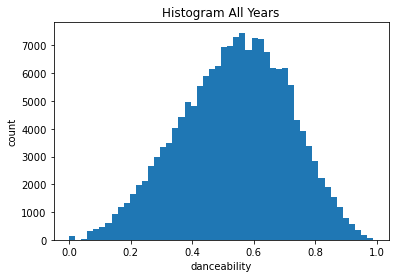

In [15]:
plt.hist(data['danceability'], bins=50)
plt.title('Histogram All Years')
plt.xlabel('danceability')
plt.ylabel('count')

## Before 21st Century - danceability

Text(0, 0.5, 'count')

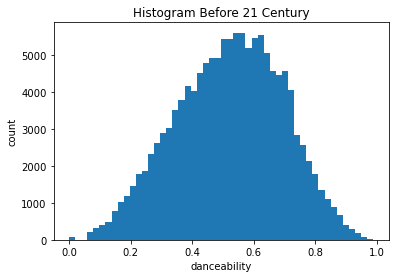

In [16]:
plt.hist(before_twentyfirst_century['danceability'], bins=50)
plt.title('Histogram Before 21 Century')
plt.xlabel('danceability')
plt.ylabel('count')

## After 21st Century - danceability

Text(0, 0.5, 'count')

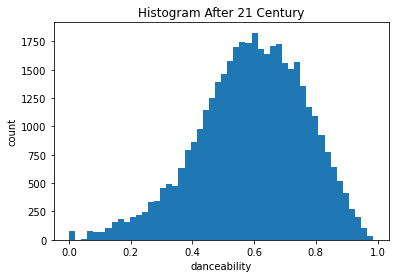

In [17]:
plt.hist(after_twentyfirst_century['danceability'], bins=50)
plt.title('Histogram After 21 Century')
plt.xlabel('danceability')
plt.ylabel('count')

## Before and After 21st Century - danceability

Text(0, 0.5, 'count')

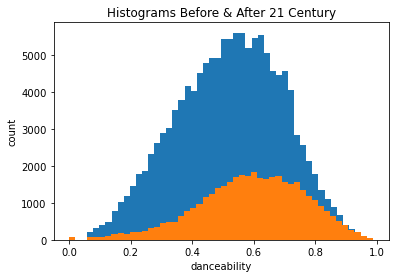

In [18]:
plt.hist(before_twentyfirst_century['danceability'], bins=50)
plt.hist(after_twentyfirst_century['danceability'], bins=50)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('danceability')
plt.ylabel('count')

## Statistics - danceability

In [41]:
x = statistics.mean(before_twentyfirst_century['danceability'])
y = statistics.mode(before_twentyfirst_century['danceability']) 
std = statistics.stdev(before_twentyfirst_century['danceability'])
var = statistics.variance(before_twentyfirst_century['danceability'])

x2 = statistics.mean(after_twentyfirst_century['danceability'])
y2 = statistics.mode(after_twentyfirst_century['danceability']) 
std2 = statistics.stdev(after_twentyfirst_century['danceability'])
var2 = statistics.variance(after_twentyfirst_century['danceability'])
  
# Printing the mean 
print("Mean before_twentyfirst_century is :", x) 

# Printing the mode 
print("Mode before_twentyfirst_century is :", y) 

# Printing the standard deviation 
print("Standard deviation before_twentyfirst_century is :", std) 

# Printing the sample variance 
print("Variance before_twentyfirst_century is :", var) 

print()

# Printing the mean 
print("Mean after_twentyfirst_century is :", x2) 

# Printing the mode 
print("Mode after_twentyfirst_century is :", y2) 

# Printing the standard deviation 
print("Standard deviation after_twentyfirst_century is :", std2)  

# Printing the sample variance 
print("Variance after_twentyfirst_century is :", var2) 

Mean before_twentyfirst_century is : 0.5219607402516641
Mode before_twentyfirst_century is : 0.565
Standard deviation before_twentyfirst_century is : 0.1728012925267565
Variance before_twentyfirst_century is : 0.029860286698917674

Mean after_twentyfirst_century is : 0.5913235828121848
Mode after_twentyfirst_century is : 0.606
Standard deviation after_twentyfirst_century is : 0.17311339114451327
Variance after_twentyfirst_century is : 0.029968246193553247


https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

## All years - energy

Text(0, 0.5, 'count')

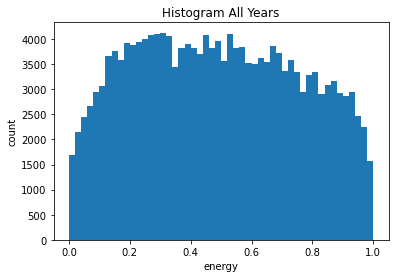

In [32]:
plt.hist(data['energy'], bins=50)
plt.title('Histogram All Years')
plt.xlabel('energy')
plt.ylabel('count')

## Before 21st Century - energy

Text(0, 0.5, 'count')

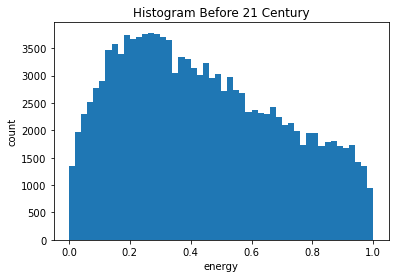

In [31]:
plt.hist(before_twentyfirst_century['energy'], bins=50)
plt.title('Histogram Before 21 Century')
plt.xlabel('energy')
plt.ylabel('count')

## After 21st Century - energy

Text(0, 0.5, 'count')

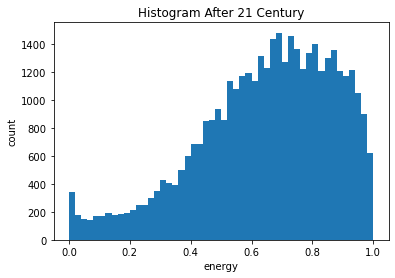

In [30]:
plt.hist(after_twentyfirst_century['energy'], bins=50)
plt.title('Histogram After 21 Century')
plt.xlabel('energy')
plt.ylabel('count')

## Before and After 21st Century - energy

Text(0, 0.5, 'count')

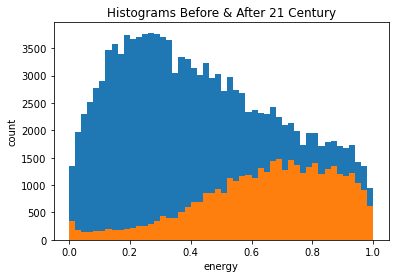

In [29]:
plt.hist(before_twentyfirst_century['energy'], bins=50)
plt.hist(after_twentyfirst_century['energy'], bins=50)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('energy')
plt.ylabel('count')

## Statistics - energy

In [43]:
x = statistics.mean(before_twentyfirst_century['energy'])
y = statistics.mode(before_twentyfirst_century['energy']) 
std = statistics.stdev(before_twentyfirst_century['energy']) 
var = statistics.variance(before_twentyfirst_century['energy'])

x2 = statistics.mean(after_twentyfirst_century['energy'])
y2 = statistics.mode(after_twentyfirst_century['energy']) 
std2 = statistics.stdev(after_twentyfirst_century['energy']) 
var2 = statistics.variance(after_twentyfirst_century['energy'])
  
# Printing the mean 
print("Mean before_twentyfirst_century is :", x) 

# Printing the mode 
print("Mode before_twentyfirst_century is :", y) 

# Printing the standard deviation 
print("Standard deviation before_twentyfirst_century is :", std) 

# Printing the sample variance 
print("Variance after_twentyfirst_century is :", var) 

print()

# Printing the mean 
print("Mean after_twentyfirst_century is :", x2) 

# Printing the mode 
print("Mode after_twentyfirst_century is :", y2) 

# Printing the standard deviation 
print("Standard deviation after_twentyfirst_century is :", std2)  

# Printing the sample variance 
print("Variance after_twentyfirst_century is :", var2) 

Mean before_twentyfirst_century is : 0.4408533988576079
Mode before_twentyfirst_century is : 0.254
Standard deviation before_twentyfirst_century is : 0.2611247388522397
Variance after_twentyfirst_century is : 0.06818612924065039

Mean after_twentyfirst_century is : 0.645397731112568
Mode after_twentyfirst_century is : 0.726
Standard deviation after_twentyfirst_century is : 0.22427906521983745
Variance after_twentyfirst_century is : 0.05030109909588411


Wikipedia - Acoustic music is music that solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means.

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
float	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

## All years - acousticness

Text(0, 0.5, 'count')

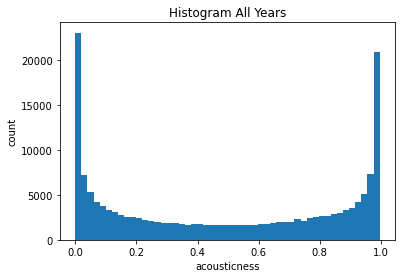

In [71]:
plt.hist(data['acousticness'], bins=50)
plt.title('Histogram All Years')
plt.xlabel('acousticness')
plt.ylabel('count')

## Before 21st Century - acousticness

Text(0, 0.5, 'count')

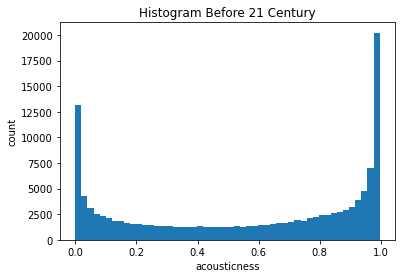

In [72]:
plt.hist(before_twentyfirst_century['acousticness'], bins=50)
plt.title('Histogram Before 21 Century')
plt.xlabel('acousticness')
plt.ylabel('count')

## After 21st Century - acousticness

Text(0, 0.5, 'count')

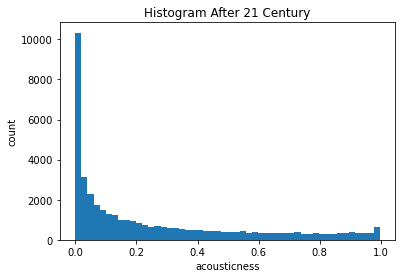

In [73]:
plt.hist(after_twentyfirst_century['acousticness'], bins=50)
plt.title('Histogram After 21 Century')
plt.xlabel('acousticness')
plt.ylabel('count')

## Before and After 21st Century - acousticness

Text(0, 0.5, 'count')

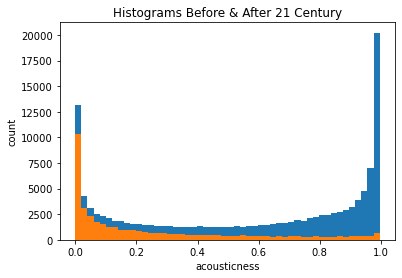

In [74]:
plt.hist(before_twentyfirst_century['acousticness'], bins=50)
plt.hist(after_twentyfirst_century['acousticness'], bins=50)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('acousticness')
plt.ylabel('count')

In [44]:
x = statistics.mean(before_twentyfirst_century['acousticness'])
y = statistics.mode(before_twentyfirst_century['acousticness']) 
std = statistics.stdev(before_twentyfirst_century['acousticness']) 
var = statistics.variance(before_twentyfirst_century['acousticness'])

x2 = statistics.mean(after_twentyfirst_century['acousticness'])
y2 = statistics.mode(after_twentyfirst_century['acousticness']) 
std2 = statistics.stdev(after_twentyfirst_century['acousticness']) 
var2 = statistics.variance(after_twentyfirst_century['acousticness'])
  
# Printing the mean 
print("Mean before_twentyfirst_century is :", x) 

# Printing the mode 
print("Mode before_twentyfirst_century is :", y) 

# Printing the standard deviation 
print("Standard deviation before_twentyfirst_century is :", std) 

# Printing the sample variance 
print("Variance after_twentyfirst_century is :", var) 

print()

# Printing the mean 
print("Mean after_twentyfirst_century is :", x2) 

# Printing the mode 
print("Mode after_twentyfirst_century is :", y2) 

# Printing the standard deviation 
print("Standard deviation after_twentyfirst_century is :", std2)  

# Printing the sample variance 
print("Variance after_twentyfirst_century is :", var2) 

Mean before_twentyfirst_century is : 0.5656009429295294
Mode before_twentyfirst_century is : 0.995
Standard deviation before_twentyfirst_century is : 0.3699640255190495
Variance after_twentyfirst_century is : 0.13687338017825992

Mean after_twentyfirst_century is : 0.25545374859415976
Mode after_twentyfirst_century is : 0.114
Standard deviation after_twentyfirst_century is : 0.2906004053557042
Variance after_twentyfirst_century is : 0.08444859559289958


https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

instrumentalness:

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

## All years - intrumentalness

Text(0, 0.5, 'count')

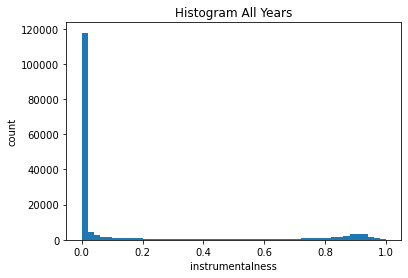

In [75]:
plt.hist(data['instrumentalness'], bins=50)
plt.title('Histogram All Years')
plt.xlabel('instrumentalness')
plt.ylabel('count')

## Before 21st Century - instrumentalness

Text(0, 0.5, 'count')

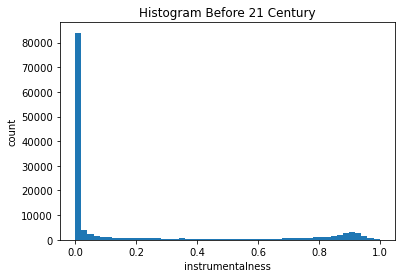

In [76]:
plt.hist(before_twentyfirst_century['instrumentalness'], bins=50)
plt.title('Histogram Before 21 Century')
plt.xlabel('instrumentalness')
plt.ylabel('count')

## After 21st Century - instrumentalness

Text(0, 0.5, 'count')

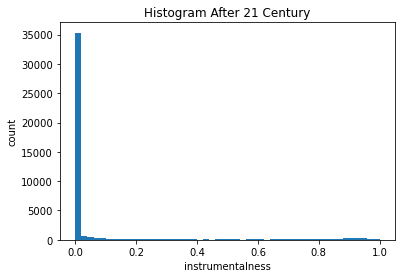

In [77]:
plt.hist(after_twentyfirst_century['instrumentalness'], bins=50)
plt.title('Histogram After 21 Century')
plt.xlabel('instrumentalness')
plt.ylabel('count')

## Before and After 21st Century - instrumentalness

Text(0, 0.5, 'count')

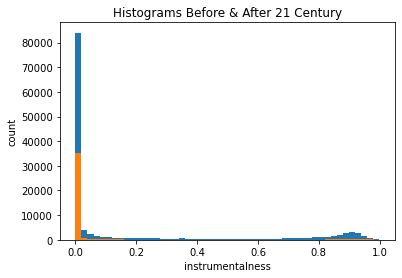

In [78]:
plt.hist(before_twentyfirst_century['instrumentalness'], bins=50)
plt.hist(after_twentyfirst_century['instrumentalness'], bins=50)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('instrumentalness')
plt.ylabel('count')

Valence:

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## All years - valence

Text(0, 0.5, 'count')

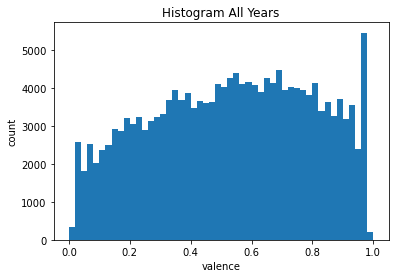

In [79]:
plt.hist(data['valence'], bins=50)
plt.title('Histogram All Years')
plt.xlabel('valence')
plt.ylabel('count')

## Before 21st Century - valence

Text(0, 0.5, 'count')

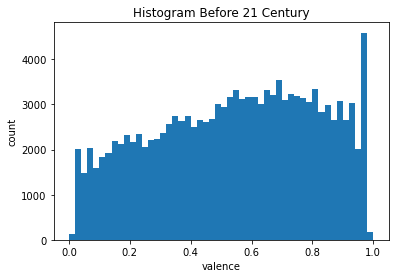

In [80]:
plt.hist(before_twentyfirst_century['valence'], bins=50)
plt.title('Histogram Before 21 Century')
plt.xlabel('valence')
plt.ylabel('count')

## After 21st Century - valence

Text(0, 0.5, 'count')

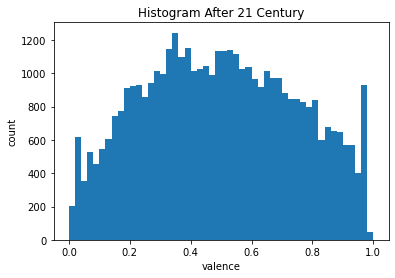

In [81]:
plt.hist(after_twentyfirst_century['valence'], bins=50)
plt.title('Histogram After 21 Century')
plt.xlabel('valence')
plt.ylabel('count')

## Before and After 21st Century - valence

Text(0, 0.5, 'count')

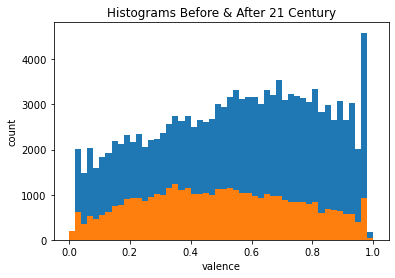

In [82]:
plt.hist(before_twentyfirst_century['valence'], bins=50)
plt.hist(after_twentyfirst_century['valence'], bins=50)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('valence')
plt.ylabel('count')

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this:

## All years - tempo

Text(0, 0.5, 'count')

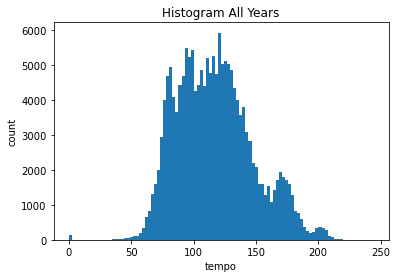

In [6]:
plt.hist(data['tempo'], bins=100)
plt.title('Histogram All Years')
plt.xlabel('tempo')
plt.ylabel('count')

## Before 21st Century - tempo

Text(0, 0.5, 'count')

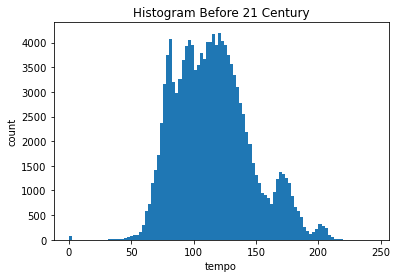

In [12]:
plt.hist(before_twentyfirst_century['tempo'], bins=100)
plt.title('Histogram Before 21 Century')
plt.xlabel('tempo')
plt.ylabel('count')

## After 21st Century - tempo

Text(0, 0.5, 'count')

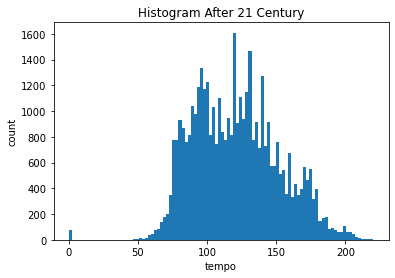

In [13]:
plt.hist(after_twentyfirst_century['tempo'], bins=100)
plt.title('Histogram After 21 Century')
plt.xlabel('tempo')
plt.ylabel('count')

## Before and After 21st Century - tempo

Text(0, 0.5, 'count')

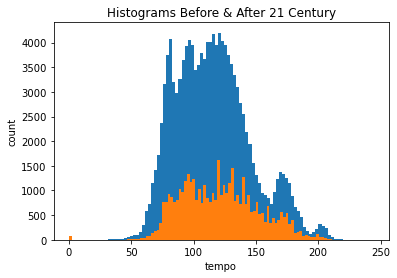

In [14]:
plt.hist(before_twentyfirst_century['tempo'], bins=100)
plt.hist(after_twentyfirst_century['tempo'], bins=100)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('tempo')
plt.ylabel('count')

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. 

Insert the "Pitch Class notation" chart into the paper and cite it!!!

# All years - key

Text(0, 0.5, 'count')

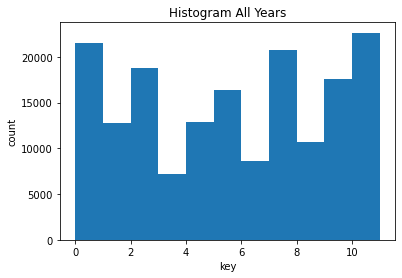

In [17]:
plt.hist(data['key'], bins=11)
plt.title('Histogram All Years')
plt.xlabel('key')
plt.ylabel('count')

## Before 21st Century - key

Text(0, 0.5, 'count')

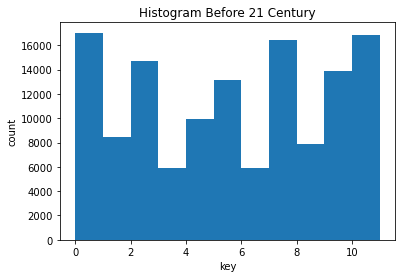

In [18]:
plt.hist(before_twentyfirst_century['key'], bins=11)
plt.title('Histogram Before 21 Century')
plt.xlabel('key')
plt.ylabel('count')

## After 21st Century - key

Text(0, 0.5, 'count')

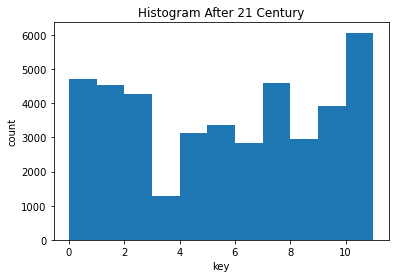

In [19]:
plt.hist(after_twentyfirst_century['key'], bins=11)
plt.title('Histogram After 21 Century')
plt.xlabel('key')
plt.ylabel('count')

## Before and After 21st Century - key

Text(0, 0.5, 'count')

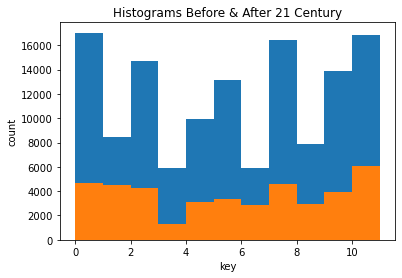

In [21]:
plt.hist(before_twentyfirst_century['key'], bins=11)
plt.hist(after_twentyfirst_century['key'], bins=11)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('key')
plt.ylabel('count')

"The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for this feature look like this:"

## All years - loudness

Text(0, 0.5, 'count')

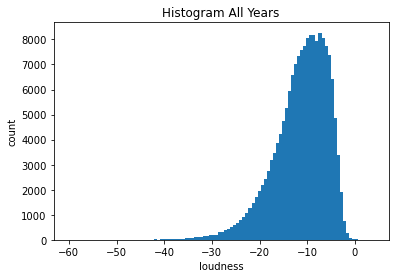

In [9]:
plt.hist(data['loudness'], bins=100)
plt.title('Histogram All Years')
plt.xlabel('loudness')
plt.ylabel('count')

## Before 21st Century - loudness

Text(0, 0.5, 'count')

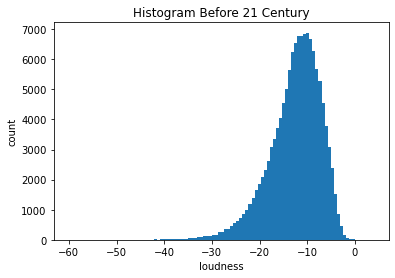

In [11]:
plt.hist(before_twentyfirst_century['loudness'], bins=100)
plt.title('Histogram Before 21 Century')
plt.xlabel('loudness')
plt.ylabel('count')

## After 21st Century - loudness 

Text(0, 0.5, 'count')

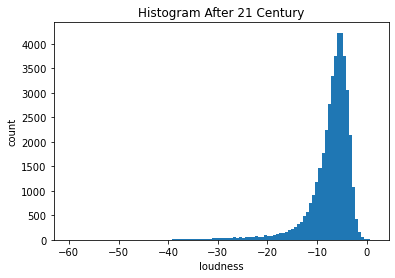

In [15]:
plt.hist(after_twentyfirst_century['loudness'], bins=100)
plt.title('Histogram After 21 Century')
plt.xlabel('loudness')
plt.ylabel('count')

## Before and After 21st Century - loudness

Text(0, 0.5, 'count')

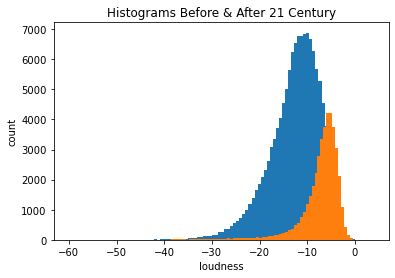

In [14]:
plt.hist(before_twentyfirst_century['loudness'], bins=100)
plt.hist(after_twentyfirst_century['loudness'], bins=100)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('loudness')
plt.ylabel('count')

# Predicting where music will be 50 years from now